# Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import cross_val_score

# Load and prepare the data

In [4]:
df = pd.read_csv('expanded_kidney_disease_dataset.csv')

features = ['age', 'bu', 'bgr', 'sc']
target = ['classification']

# Prepare the features (X) and target (y)
X = df[features]
y = df[target]

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")



Train set shape: (3000, 4)
Validation set shape: (1000, 4)
Test set shape: (1000, 4)


In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,3.0,48.0,70.0,1.005,4.0,0.0,1.0,0.0,117.0,56.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,9.0,53.0,90.0,1.020,2.0,0.0,0.0,0.0,70.0,107.0,...,29.0,12100.0,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1.0
2,11.0,63.0,70.0,1.010,3.0,0.0,0.0,0.0,380.0,60.0,...,32.0,4500.0,3.8,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3,14.0,68.0,80.0,1.010,3.0,2.0,1.0,0.0,157.0,90.0,...,16.0,11000.0,2.6,1.0,1.0,1.0,0.0,1.0,0.0,1.0
4,20.0,61.0,80.0,1.015,2.0,0.0,0.0,0.0,173.0,148.0,...,24.0,9200.0,3.2,1.0,1.0,1.0,0.0,1.0,1.0,1.0


In [5]:
def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Train the classfication models

In [9]:
def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def plot_feature_importance(importances, title):
    plt.figure(figsize=(10,6))
    importances_df = pd.DataFrame({'feature': features, 'importance': importances})
    importances_df = importances_df.sort_values('importance', ascending=True)
    plt.barh(importances_df['feature'], importances_df['importance'])
    plt.title(title)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

==
def evaluate_model(model, X_train, X_val, X_test, y_train, y_val, y_test, model_name):
    # Convert y to 1D array to avoid warnings
    y_train = np.ravel(y_train)
    y_val = np.ravel(y_val)
    y_test = np.ravel(y_test)

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"\n{model_name}:")
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Mean CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Evaluate on validation set
    y_val_pred = model.predict(X_val)
    print("\nClassification Report (Validation Set):")
    print(classification_report(y_val, y_val_pred))
    cm_val = confusion_matrix(y_val, y_val_pred)
    plot_confusion_matrix(cm_val, classes=np.unique(y_val), title=f'Confusion Matrix - {model_name} (Validation Set)')
    
    # Evaluate on test set
    y_test_pred = model.predict(X_test)
    print("\nClassification Report (Test Set):")
    print(classification_report(y_test, y_test_pred))
    cm_test = confusion_matrix(y_test, y_test_pred)
    plot_confusion_matrix(cm_test, classes=np.unique(y_test), title=f'Confusion Matrix - {model_name} (Test Set)')
    
    if hasattr(model, 'feature_importances_'):
        print("\nFeature Importance:")
        feature_importance = model.feature_importances_
        for f, imp in zip(features, feature_importance):
            print(f"{f}: {imp:.4f}")
        plot_feature_importance(feature_importance, f'Feature Importance - {model_name}')
    elif model_name == "Logistic Regression":
        print("\nFeature Importance (absolute coefficients):")
        feature_importance = abs(model.coef_[0])
        for f, imp in zip(features, feature_importance):
            print(f"{f}: {imp:.4f}")
        plot_feature_importance(feature_importance, f'Feature Importance - {model_name}')
    
    return model


# Set models

In [10]:

def logistic_regression_model(X_train, X_val, X_test, y_train, y_val, y_test):
    model = LogisticRegression(random_state=42)
    return evaluate_model(model, X_train, X_val, X_test, y_train, y_val, y_test, "Logistic Regression")

def decision_tree_model(X_train, X_val, X_test, y_train, y_val, y_test):
    model = DecisionTreeClassifier(random_state=42)
    return evaluate_model(model, X_train, X_val, X_test, y_train, y_val, y_test, "Decision Tree")

def svm_model(X_train, X_val, X_test, y_train, y_val, y_test):
    model = SVC(random_state=42)
    return evaluate_model(model, X_train, X_val, X_test, y_train, y_val, y_test, "SVM")

def random_forest_model(X_train, X_val, X_test, y_train, y_val, y_test):
    model = RandomForestClassifier(random_state=42)
    return evaluate_model(model, X_train, X_val, X_test, y_train, y_val, y_test, "Random Forest")

# Logistic Regression


Logistic Regression:
Cross-Validation Scores: [0.98166667 0.97333333 0.975      0.965      0.98      ]
Mean CV Score: 0.9750 (+/- 0.0117)

Classification Report (Validation Set):
              precision    recall  f1-score   support

        -0.0       0.97      0.99      0.98       741
         1.0       0.98      0.91      0.94       259

    accuracy                           0.97      1000
   macro avg       0.97      0.95      0.96      1000
weighted avg       0.97      0.97      0.97      1000



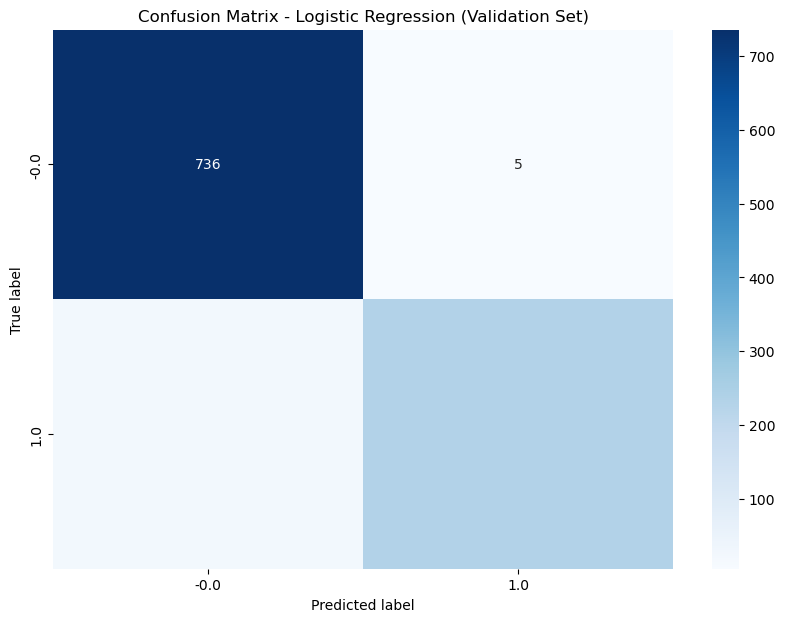


Classification Report (Test Set):
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       722
         1.0       0.98      0.92      0.95       278

    accuracy                           0.97      1000
   macro avg       0.98      0.96      0.97      1000
weighted avg       0.97      0.97      0.97      1000



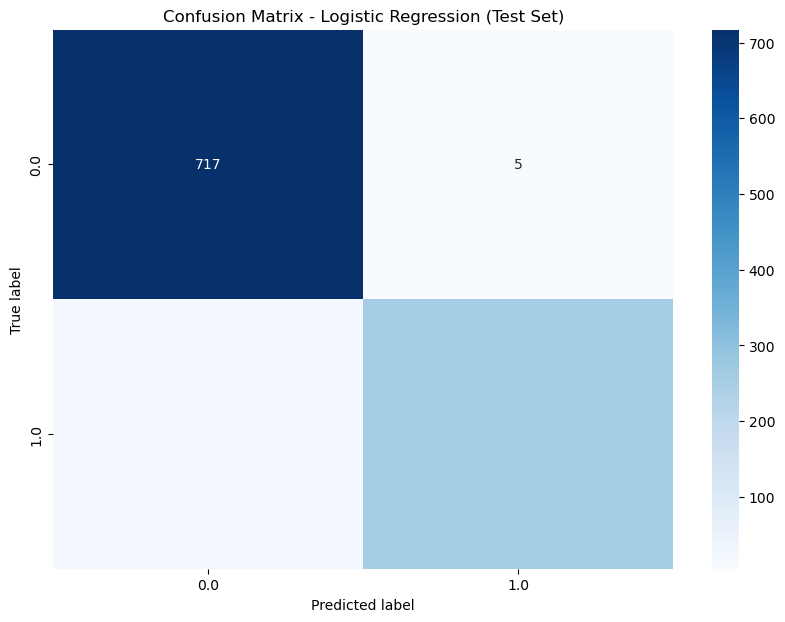


Feature Importance (absolute coefficients):
age: 0.0305
bu: 0.1032
bgr: 0.0378
sc: 3.8540


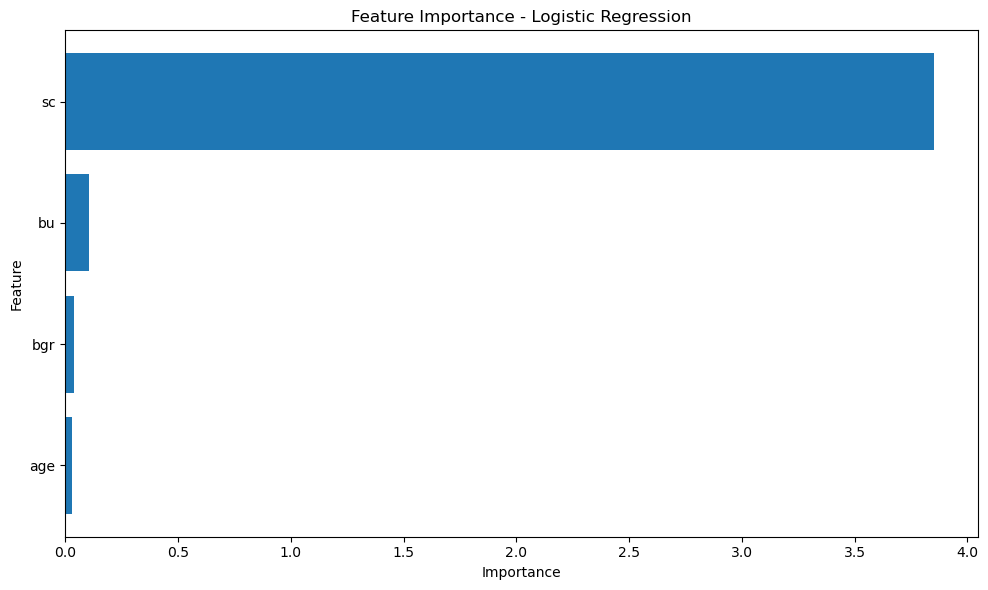

LogisticRegression(random_state=42)

In [14]:

logistic_regression_model(X_train, X_val, X_test, y_train, y_val, y_test)


# Decision Tree


Decision Tree:
Cross-Validation Scores: [0.98666667 0.99       0.98666667 0.98166667 0.98166667]
Mean CV Score: 0.9853 (+/- 0.0065)

Classification Report (Validation Set):
              precision    recall  f1-score   support

        -0.0       0.99      0.98      0.99       741
         1.0       0.95      0.97      0.96       259

    accuracy                           0.98      1000
   macro avg       0.97      0.98      0.97      1000
weighted avg       0.98      0.98      0.98      1000



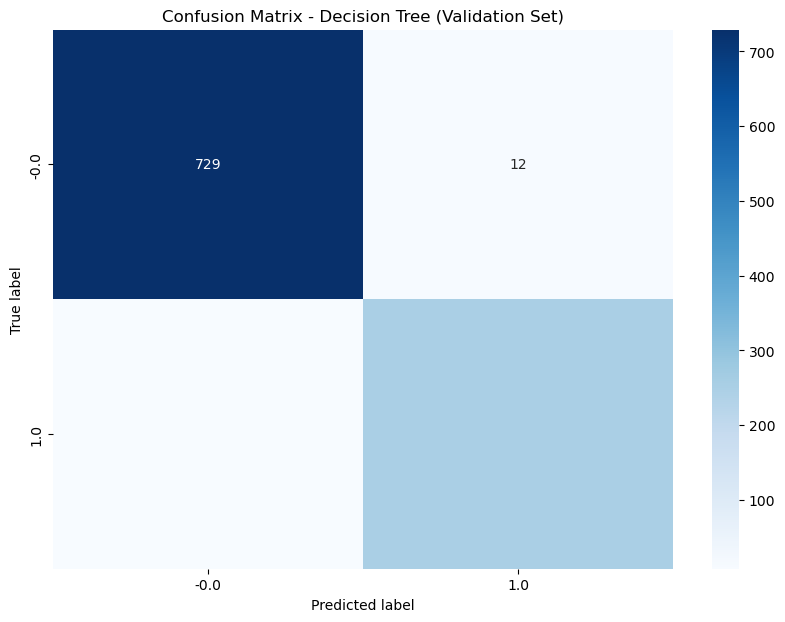


Classification Report (Test Set):
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       722
         1.0       0.97      0.98      0.98       278

    accuracy                           0.99      1000
   macro avg       0.98      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



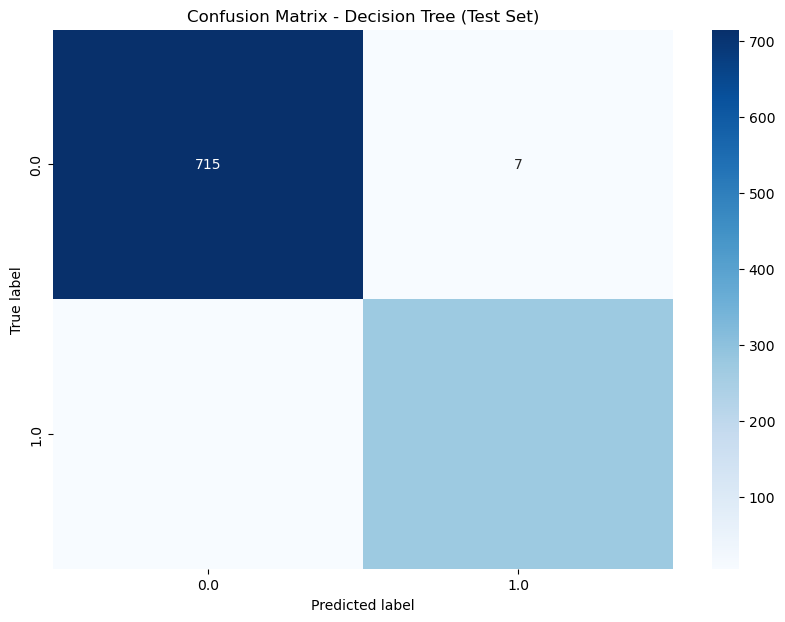


Feature Importance:
age: 0.0769
bu: 0.0175
bgr: 0.1155
sc: 0.7901


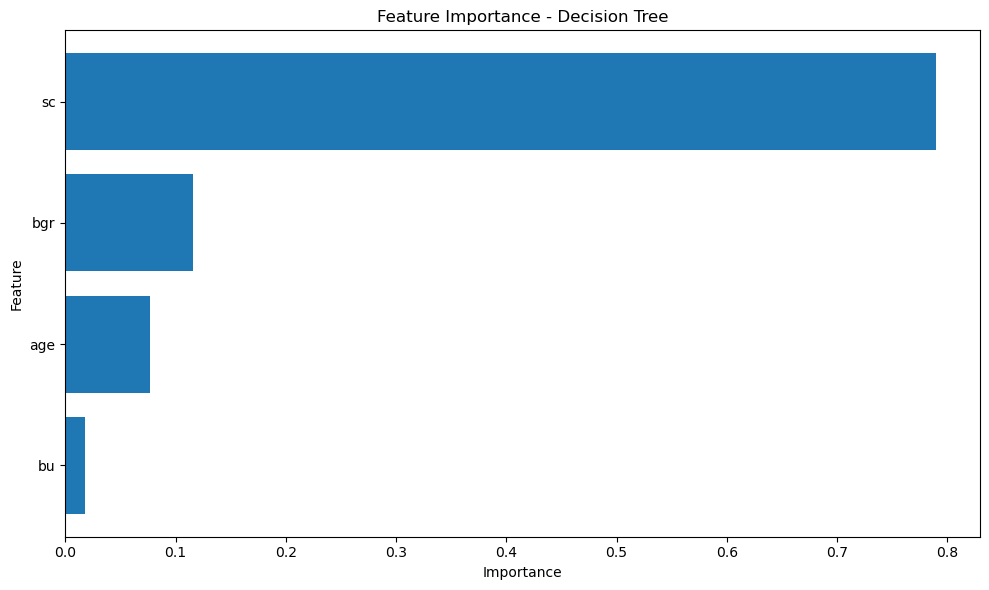

DecisionTreeClassifier(random_state=42)

In [13]:
decision_tree_model(X_train, X_val, X_test, y_train, y_val, y_test)


# SVM Model


SVM:
Cross-Validation Scores: [0.94       0.95666667 0.95166667 0.94       0.96333333]
Mean CV Score: 0.9503 (+/- 0.0184)

Classification Report (Validation Set):
              precision    recall  f1-score   support

        -0.0       0.93      1.00      0.96       741
         1.0       1.00      0.79      0.88       259

    accuracy                           0.94      1000
   macro avg       0.97      0.89      0.92      1000
weighted avg       0.95      0.94      0.94      1000



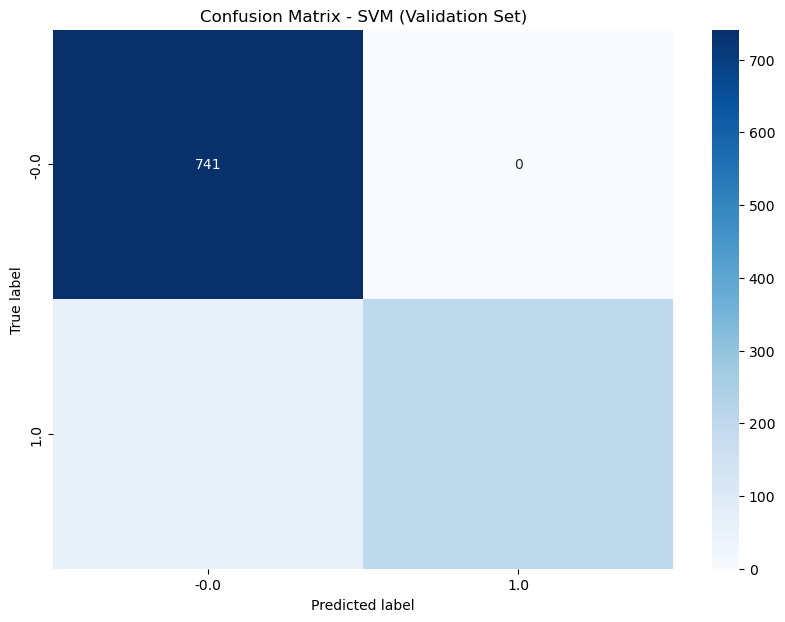


Classification Report (Test Set):
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       722
         1.0       1.00      0.83      0.91       278

    accuracy                           0.95      1000
   macro avg       0.97      0.91      0.94      1000
weighted avg       0.95      0.95      0.95      1000



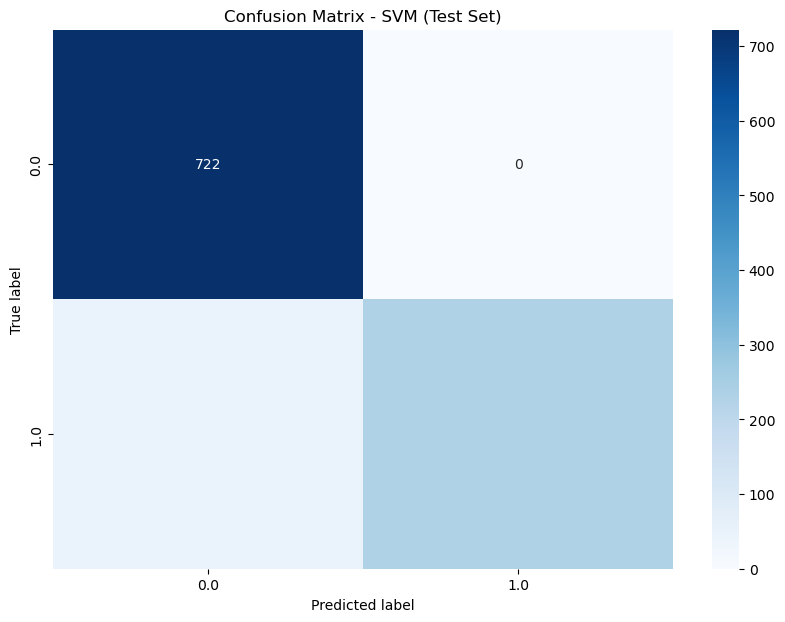

SVC(random_state=42)

In [12]:
svm_model(X_train, X_val, X_test, y_train, y_val, y_test)


# Random Forest


Random Forest:
Cross-Validation Scores: [0.99333333 0.99166667 0.98666667 0.98333333 0.98333333]
Mean CV Score: 0.9877 (+/- 0.0083)

Classification Report (Validation Set):
              precision    recall  f1-score   support

        -0.0       0.99      0.99      0.99       741
         1.0       0.98      0.97      0.97       259

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



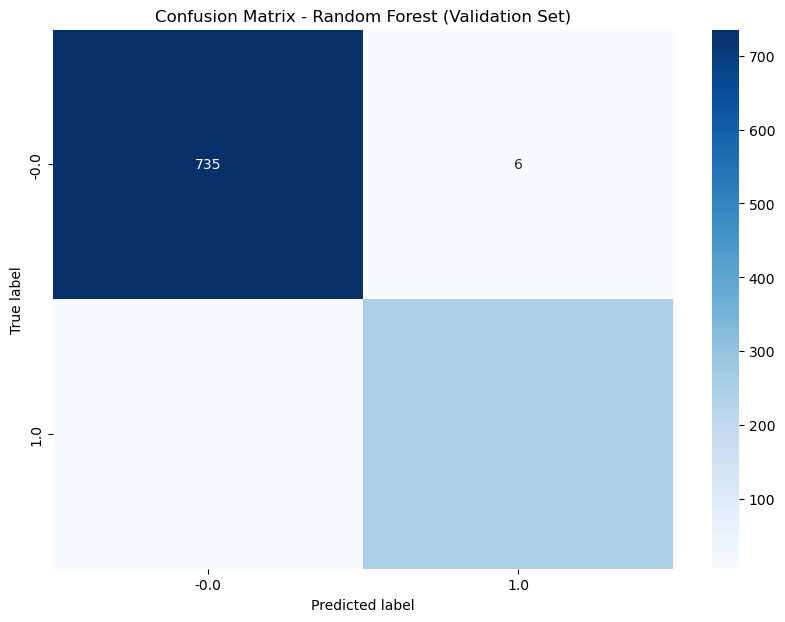


Classification Report (Test Set):
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       722
         1.0       0.98      0.97      0.97       278

    accuracy                           0.99      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.99      0.99      0.99      1000



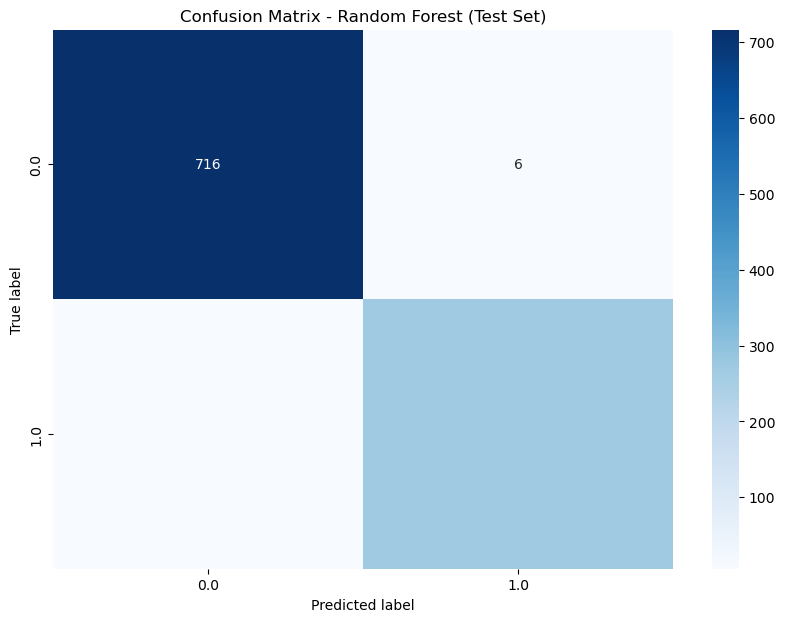


Feature Importance:
age: 0.0468
bu: 0.2726
bgr: 0.2293
sc: 0.4512


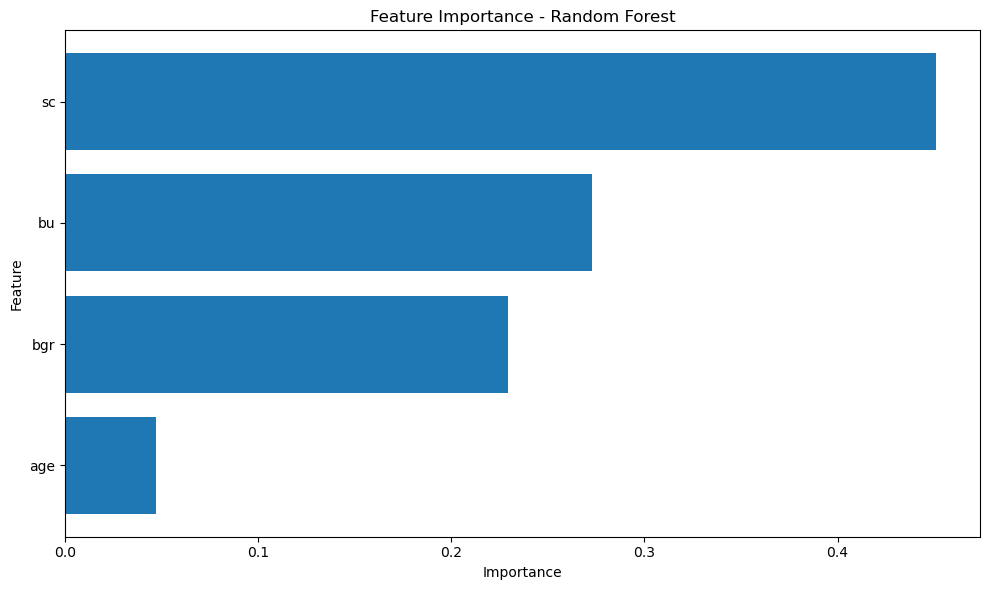

RandomForestClassifier(random_state=42)

In [11]:
random_forest_model(X_train, X_val, X_test, y_train, y_val, y_test)

# Save model aas pkl pipeline


Random Forest:
Classification Report (Validation Set):
              precision    recall  f1-score   support

        -0.0       0.99      0.99      0.99       741
         1.0       0.98      0.97      0.97       259

    accuracy                           0.99      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.99      0.99      0.99      1000



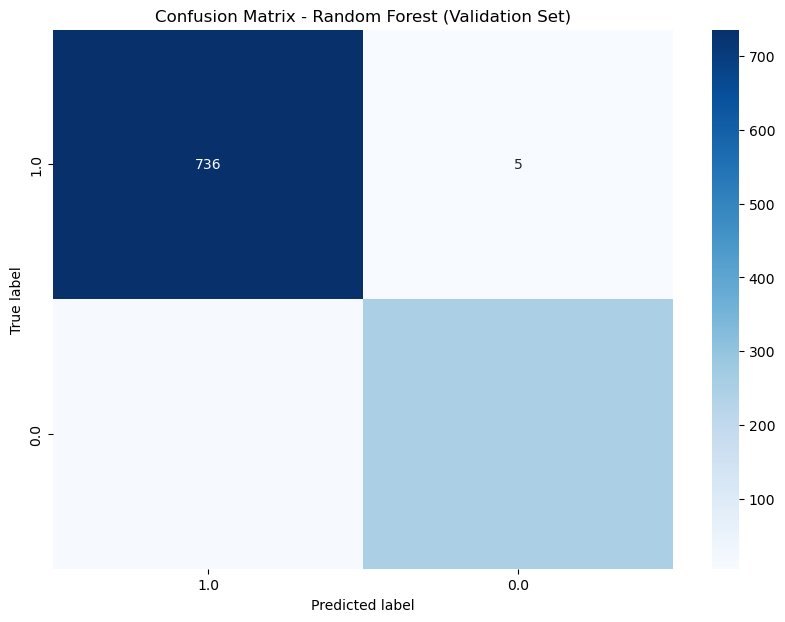


Random Forest:
Classification Report (Test Set):
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       722
         1.0       0.97      0.97      0.97       278

    accuracy                           0.99      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.99      0.99      0.99      1000



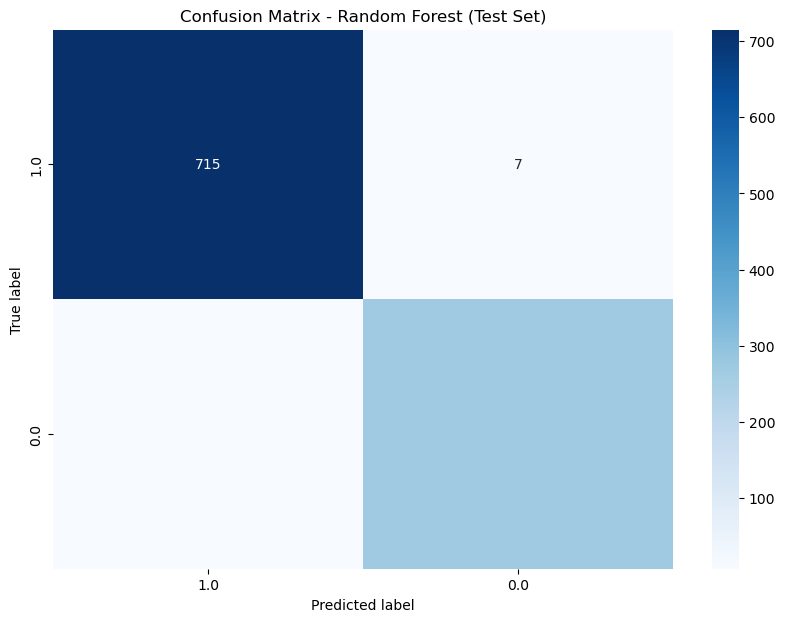


Random Forest pipeline (including imputer and scaler) has been saved as 'random_forest_pipeline.pkl'


In [43]:
def random_forest_model(X_train, X_val, X_test, y_train, y_val, y_test):
    # Create a pipeline with SimpleImputer, StandardScaler, and RandomForestClassifier
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('rf', RandomForestClassifier(random_state=42))
    ])
    return evaluate_model(pipeline, X_train, X_val, X_test, y_train, y_val, y_test, "Random Forest")

# Train and evaluate the Random Forest model
rf_model = random_forest_model(X_train, X_val, X_test, y_train, y_val, y_test)

# Save the model using pickle
with open('random_forest_pipeline.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("\nRandom Forest pipeline (including imputer and scaler) has been saved as 'random_forest_pipeline.pkl'")
